In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("sales_data_with_discounts.csv")
df                                                    # Load dataset from the specified file path

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [20]:
dn = df.select_dtypes(include=['int64', 'float64']).columns    #Select numerical columns for analysis

In [21]:
#Calculate and display descriptive statistics for numerical columns (Mean, Median, Mode, Std Dev)
stats = pd.DataFrame({
    "Mean": df[dn].mean(),
    "Median": df[dn].median(),
    "Mode": df[dn].mode().iloc[0],
    "Std Dev": df[dn].std()
})

In [22]:
stats

,Mean,Median,Mode,Std Dev
Volume,5.066667,4.000000,3.000000,4.231602
Avg Price,10453.433333,1450.000000,400.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.000000,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,4.220602
Discount Amount,3346.499424,988.933733,69.177942,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,46358.656624


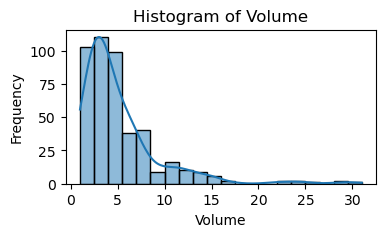

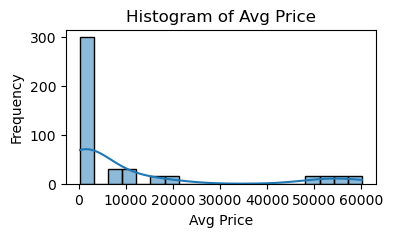

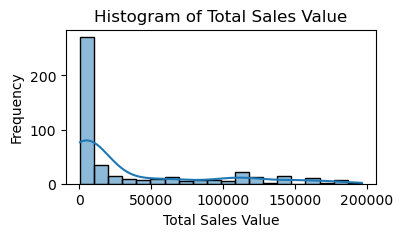

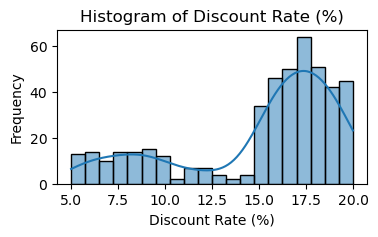

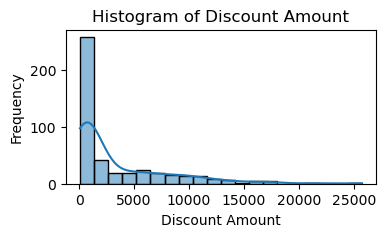

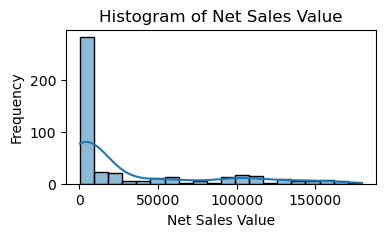

In [23]:
# Generate and display histograms for each numerical column to visualize data distribution
for col in dn:
    plt.figure(figsize=(4,2))
    sns.histplot(df[col], kde=True, bins=20) # Create a histogram with a kernel density estimate
    plt.title(f"Histogram of {col}") # Set the title of the plot
    plt.xlabel(col) # Label the x-axis
    plt.ylabel("Frequency") # Label the y-axis
    plt.show() # Display the plot

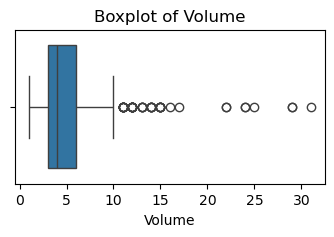

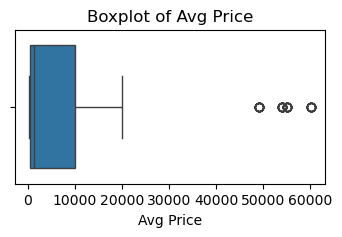

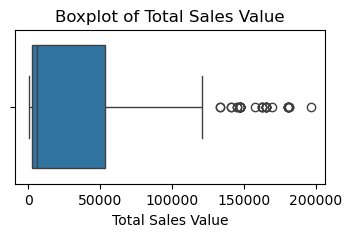

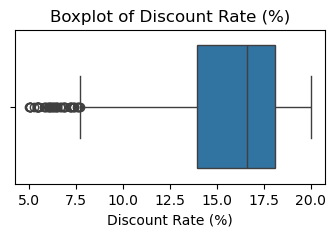

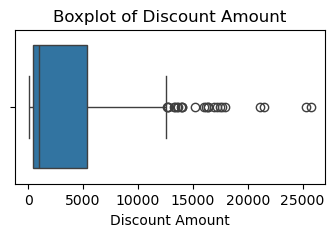

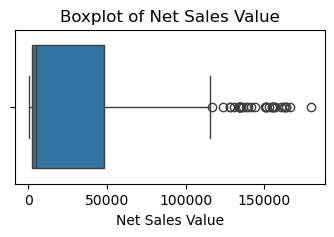

In [24]:
# Generate and display boxplots for each numerical column to identify outliers and data spread
for col in dn:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=df[col]) # Create a boxplot
    plt.title(f"Boxplot of {col}") # Set the title of the plot
    plt.xlabel(col) # Label the x-axis
    plt.show() # Display the plot

In [25]:
# Select categorical columns for analysis
dc = df.select_dtypes(include=['object']).columns
dc

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

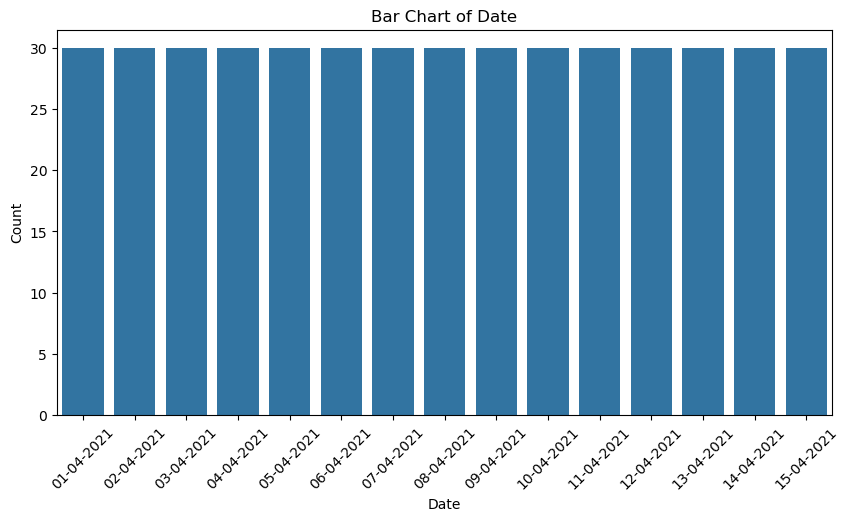

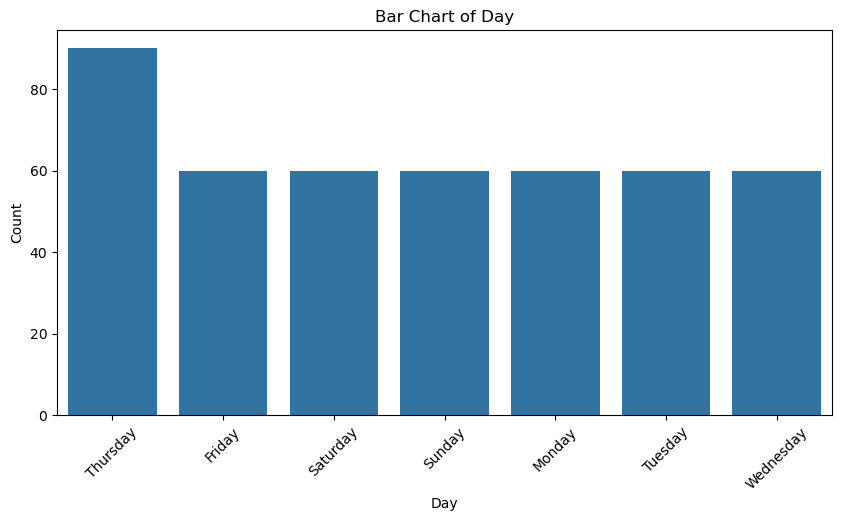

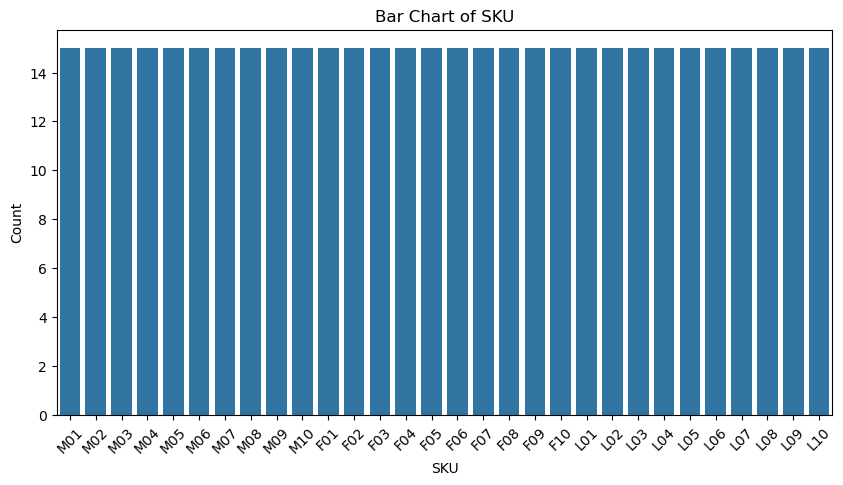

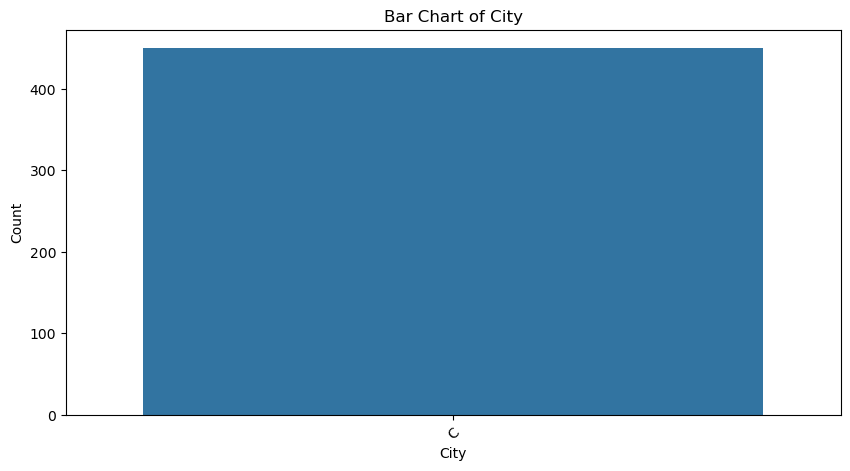

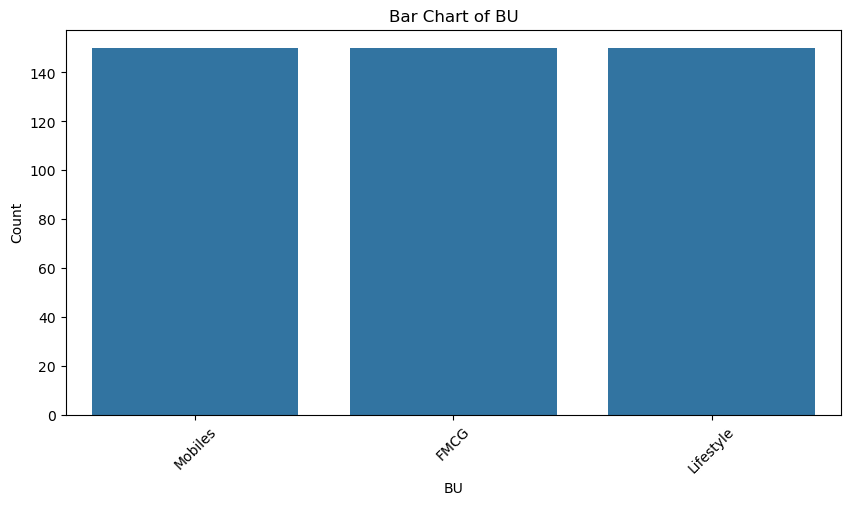

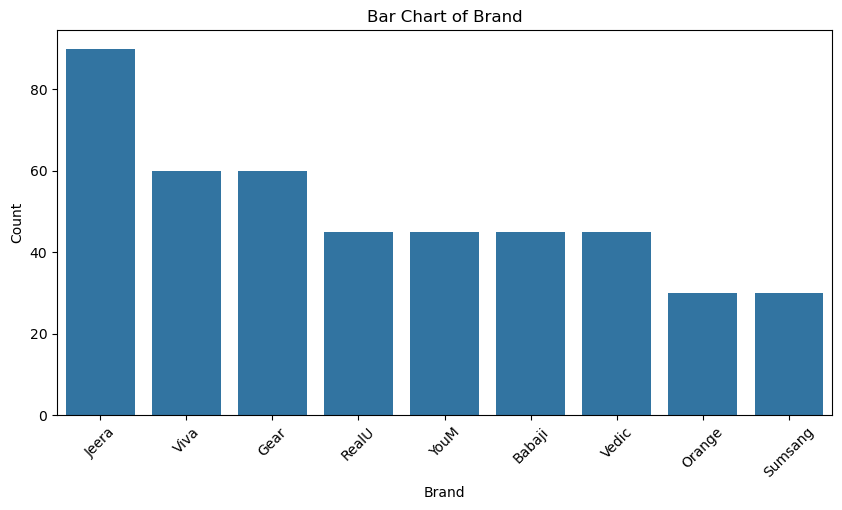

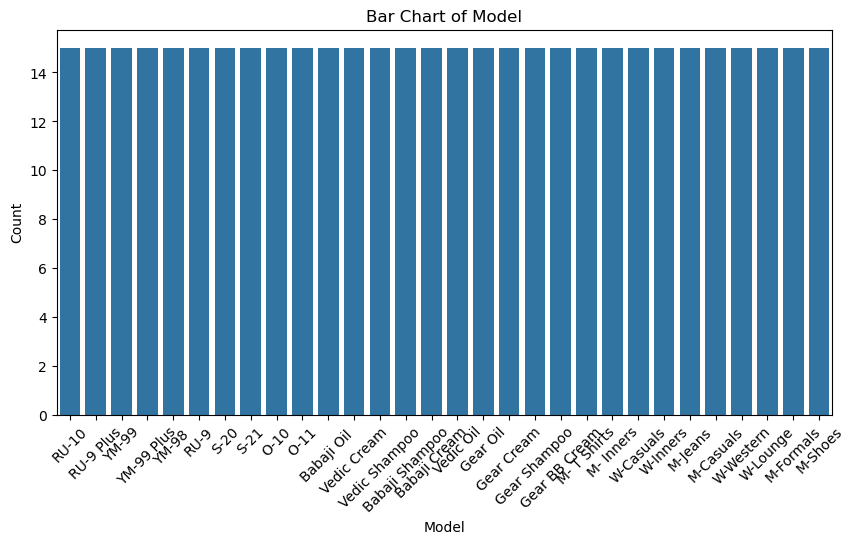

In [26]:
# Generate and display bar charts for each categorical column to show the frequency of each category
for col in dc:
    plt.figure(figsize=(10,5))
    # Create a countplot (bar chart) ordered by the frequency of each category
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Bar Chart of {col}") # Set the title of the plot
    plt.xticks(rotation=45) # Rotate x-axis labels for better readability
    plt.ylabel("Count") # Label the y-axis
    plt.show() # Display the plot